<a href="https://colab.research.google.com/github/markumreed/colab_sklearn/blob/main/random_forest_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest: Loan Data

Here are what the columns represent:
- **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- **installment**: The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico**: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
- **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("loan_data.csv")

In [7]:
df.columns = [c.replace(".","_") for c in df.columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int_rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log_annual_inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days_with_cr_line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol_bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol_util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq_last_6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [10]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [12]:
df['credit_policy'].unique()

array([1, 0])

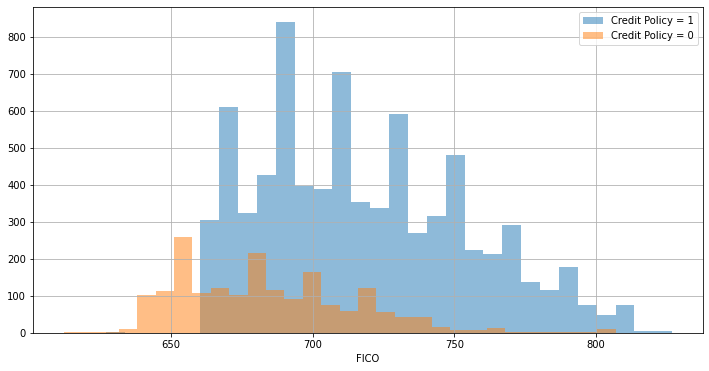

In [19]:
plt.figure(figsize=(12, 6))
df[df['credit_policy'] == 1]['fico'].hist(alpha=0.5, bins=30, label="Credit Policy = 1")
df[df['credit_policy'] == 0]['fico'].hist(alpha=0.5, bins=30, label="Credit Policy = 0")
plt.legend()
plt.xlabel("FICO");

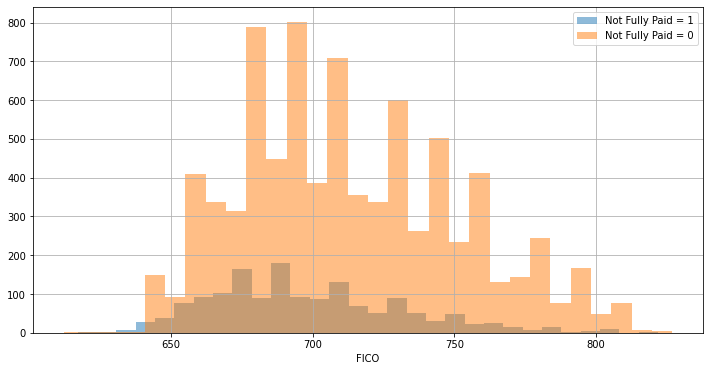

In [20]:
plt.figure(figsize=(12, 6))
df[df['not_fully_paid'] == 1]['fico'].hist(alpha=0.5, bins=30, label="Not Fully Paid = 1")
df[df['not_fully_paid'] == 0]['fico'].hist(alpha=0.5, bins=30, label="Not Fully Paid = 0")
plt.legend()
plt.xlabel("FICO");

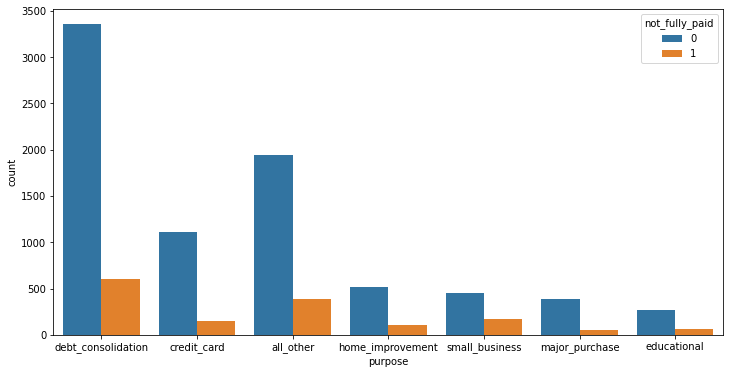

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x="purpose", hue="not_fully_paid", data=df);

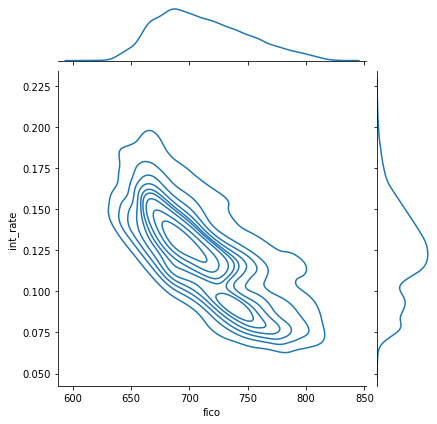

In [26]:
sns.jointplot(x="fico", y="int_rate", kind="kde", data=df);

<Figure size 864x432 with 0 Axes>

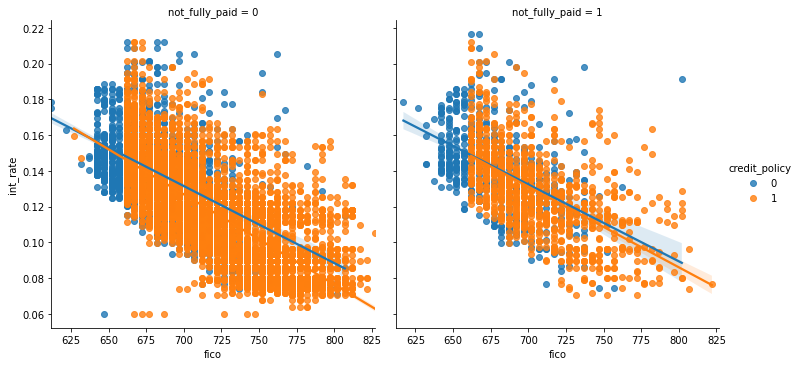

In [27]:
plt.figure(figsize=(12, 6))
sns.lmplot(y="int_rate", x="fico", data=df, hue="credit_policy", 
           col="not_fully_paid");

# Categorical Features

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [29]:
cat_features = ['purpose']

In [30]:
df_final = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   int_rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log_annual_inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days_with_cr_line           9578 non-null   float64
 7   revol_bal                   9578 non-null   int64  
 8   revol_util                  9578 non-null   float64
 9   inq_last_6mths              9578 non-null   int64  
 10  delinq_2yrs                 9578 non-null   int64  
 11  pub_rec                     9578 non-null   int64  
 12  not_fully_paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [32]:
df.value_counts("purpose")

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
dtype: int64

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_final.drop("not_fully_paid", axis=1)
y = df_final['not_fully_paid']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc = DecisionTreeClassifier()

In [40]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predictions and Eval of DT

In [41]:
pred = dtc.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.21      0.22      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [45]:
print(confusion_matrix(y_test, pred))

[[2236  414]
 [ 400  111]]


# Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=600)

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Prediction and Eval

In [49]:
pred = rfc.predict(X_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.35      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161



In [51]:
print(confusion_matrix(y_test, pred))

[[2635   15]
 [ 503    8]]


# Unbalanced Classes

In [52]:
df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [53]:
y_train.value_counts()

0    5395
1    1022
Name: not_fully_paid, dtype: int64

In [54]:
y_test.value_counts()

0    2650
1     511
Name: not_fully_paid, dtype: int64